# Executando o processo para fazer a atividade do exercico 4

- Crie o algoritmo k-means
- Crie o algoritmo de agrupamento hieraquico Single Link
- Crie um criteiro de validação relativo Silhueta Simplifica
- Compare o seu algoritmo e as Silhueta simplifica criada e a que já existe

## Importanto as base importantes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from K_means_class import KMeans as km
import Single_link as sk
import Silhueta_Simplificada_new as neS
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Base Iris implementada
# Carregar a base de dados Iris
iris = load_iris()
df = iris.data

# CLUSTER
K = 3

## Iniciando o a analise da base de dados 

In [3]:
# Verificar valores ausentes
print(np.isnan(df).any())

# Como o retorno foi False então não existe nenhum dado null na base iris

False


## K-means

- Recebe um inteiro positivo K e um conjuto de n dados de treino, cada um deles descrito por um vetor numérico com comprimento d.
- Define k pontos aleatórios(centroids) no espaço dimensional d.
- Enquanto os k pontos não convergirem:
    - Para cada dado de treino, o algoritmo encontra qual é o centroide mais próximo e define-o como representante do dado de treino.
    - Para cada agrupamento, o algoritmo encontra quem são os fafos de treino agrupados por esse ponto k, calcula a média aritmética desses dados de treino e define o resultado como novo valor para respresnetar o agrupamento, atualiza o valor do centroide.

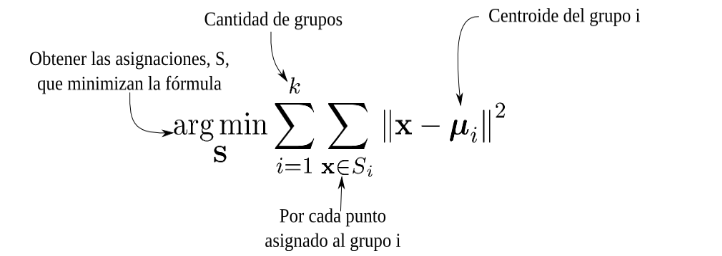

## Como utilizar o algoritmo K-means implemento nesse artigo
1. Importe o KMeans as km
   a. que é o from K_means_class import KMeans as km
2. Para executar o km, você precisa que a base de dados já está pronta
3. Com a base de dados pronta, precisamos criar nosso modulo, pois esse KMeans é uma classe
4. Para criar um modulo pode seguir esse exemplo
   a. ```modelX = km(max_iter = 600, tolerance = 0.5, clusters = 3, run = 600,distance_metric='euclidean')```
   b. max_inter é o maximo de interação que podemos ter
   c. tolerance é a tolerancia que podemos ter dos cluster
   d. clusters é quantidade de cluster
   e. run é a quantidade de execução que vamos ter
   f. distance_metric é o calculo de distancia, pode colocar euclidiana, manrathan e cosine
   g. init_cluster é como vamos iniciar o cluster, pode ser aleatiro ou utilizando algumas metricas como forgy,macqueen,maxmin
6. Para executar o modelX você chama o seguinte codigo
   ```(clustersX, data_with_clustersX) = modelX.fit(x)```
   

In [4]:
modelX = km(max_iter = 600, tolerance = 0.5, clusters = K, run = 600,distance_metric='euclidean')
(clustersX, data_with_clustersX) = modelX.fit(df)

### Mostrar o grafico de agrupamento

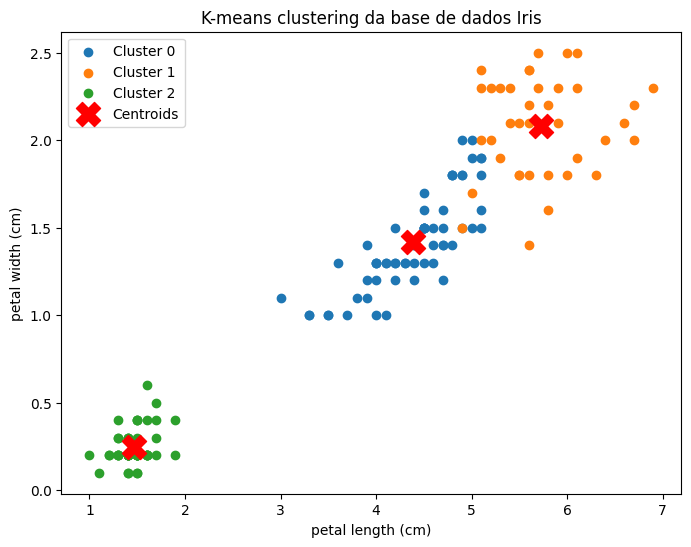

In [5]:
x_index = 2  # Comprimento da pétala
y_index = 3  # Largura da pétala

plt.figure(figsize=(8, 6))

xxx = np.unique(data_with_clustersX[:,4])

# Criar um scatter plot com as cores dos clusters
for cluster in range(len(xxx)):
    plt.scatter(df[data_with_clustersX[:,4] == cluster, x_index], 
                df[data_with_clustersX[:,4] == cluster, y_index], 
                label=f'Cluster {cluster}')

# Plotar os centroids
plt.scatter(clustersX[:, x_index], 
            clustersX[:, y_index], 
            s=300, c='red', marker='X', label='Centroids')

# Adicionar título e legendas
plt.title('K-means clustering da base de dados Iris')
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.legend()

# Mostrar o gráfico
plt.show()

### Vamos analisar a silhueta simplificada do k-means 

In [6]:

silhouette_avg = neS.silhouette_score(df, data_with_clustersX[:,4])
print(f'Silhueta média: {silhouette_avg}')

Silhueta média: 0.5509794593205521


## Silhueta simplificada
- Calcular a Distância entre Pontos
- Calcular a Coesão
- Calcular a Sepração
- Calcular a Silhueta Média

Quanto mais proximo de 1 melhor e quanto mais proximo de -1 pior está os centroids do Algoritmo utilizado


## Single Link
 É um metodo de agrupamento hieráquico que constroi uma árvore de grupos, chamada dendograma, através de um processo iterativo. Esse algoritmo agrupa os dados com base na menor distancia entre pontos de diferentes grupos.

- Comece com cada ponto de dados em seu prórpio grupo individual. Se você tiver n pontos, você começará com n grupos.
- Calcule a matriz de distâncias entre todos os praes de pontos no conjuto de dados. A distancia pode ser qualuer métrica, mas geralmente é a distância euclidiana.
- Encontre o par de grupo que tem a menor distância entre qualquer dois pontos. Essa distância minima é chamada de "link simples"
- Una os dois clusters encontrados no passo anterior em um único grupo. Agora, você tem n - 1 grupo.
- Atualize a matriz de distâncias. Para o novo grupo formado, a distância entre este e qualquer outro grupo é a menor distância entre qualquer membro do novo cluster e qualquer membro do outro grupo


In [7]:
final_clusters = sk.single_linkage_clustering(df,K)

In [8]:
print(f'Clusters finais: {final_clusters}')

Clusters finais: [{0, 1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149}, {2}, {3}]


In [9]:
labels = np.zeros(df.shape[0], dtype=int)
for cluster_index, cluster in enumerate(final_clusters):
    for point_index in cluster:
        labels[point_index] = cluster_index

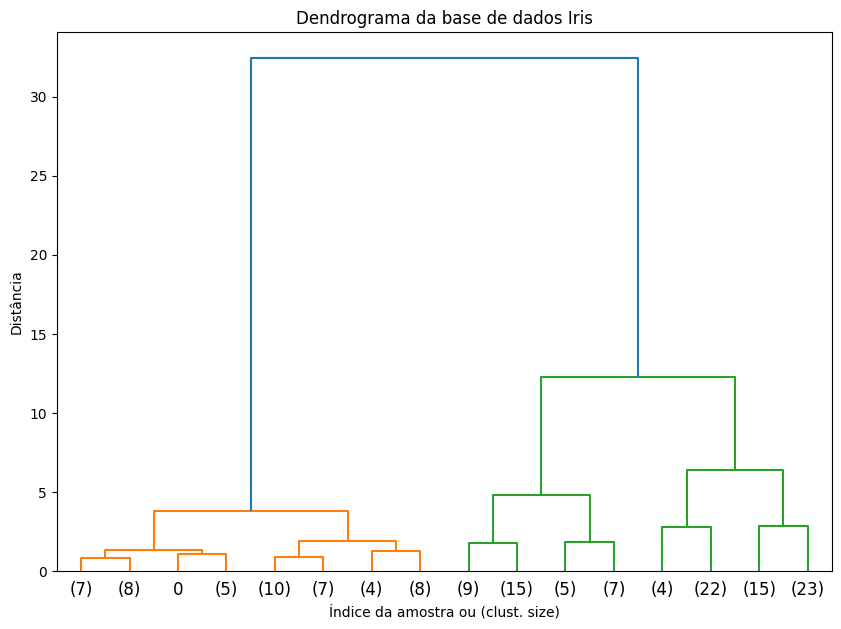

In [10]:
# Gerar a matriz de ligação
Z = linkage(df, method='ward')

# Plotar o dendrograma
plt.figure(figsize=(10, 7))
plt.title("Dendrograma da base de dados Iris")
dendrogram(Z, truncate_mode='level', p=3, labels=iris.target)
plt.xlabel("Índice da amostra ou (clust. size)")
plt.ylabel("Distância")
plt.show()

## Calculo da silhueta simplifica

In [11]:
silhouette = neS.silhouette_score(df,labels)
print(f'Silhueta média: {silhouette}')

Silhueta média: 0.037924940621265106


# Analisando as Silhuetas simplificas

k-means = 0.5509794593205521
Single_link = 0.037924940621265106

Então o k-means para essa base de dados é o melhor algoritmo para agrupar os dados e apresentar a analise